In [ ]:
__nbid__ = '0010'
__author__ = 'Robert Nikutta <robert.nikutta@noirlab.edu>, Stéphanie Juneau <stephanie.juneau@noirlab.edu>, Knut Olsen <knut.olsen@noirlab.edu>, David Nidever <david.nidever@noirlab.edu>, David Herrera <david.herrera@noirlab.edu>'
__version__ = '20251205' # yyyymmdd
__datasets__ = ['smash_dr1']
__keywords__ = ['science example', 'dwarf galaxies']

# Detectando la galaxia enana Hydra II en SMASH DR1

*Robert Nikutta, Stéphanie Juneau, Knut Olsen, David Nidever, & Astro Data Lab Team*

#### (_Traducción de [DwarfGalaxiesInSmash.ipynb](https://github.com/astro-datalab/notebooks-latest/blob/master/03_ScienceExamples/DwarfGalaxies/DwarfGalaxiesInSmash.ipynb)_)

### Tabla de contenido
* [Objetivos y resumen del notebook](#goals)
* [Avisos legales y atribuciones](#attribution)
* [Importaciones y configuración](#import)
* [Autenticación](#auth)
* [Consultar el catálogo SMASH DR1 para estrellas azules (esperadas en enanas pobres en metales)](#query)
* [Gráfico de densidad espacial](#spatial)
* [Detectar sobredensidades (núcleos Gaussianos diferenciales)](#kernel)
* [Identificar máximos](#peaks)
* [Inspeccionar recortes de imágenes alrededor de los máximos (Simple Image Access)](#sia)
* [Diagramas CM de todas las estrellas alrededor de los máximos](#cmdiagrams)
* [Guardar resultados en un archivo local](#savefile)
* [Recursos](#resource)

<a class="anchor" id="goals"></a>
# Objetivos

Usaremos un algoritmo de detección de galaxias enanas basado en la sobredensidad espacial de estrellas azules para redescubrir la galaxia enana Hydra II en el conjunto de datos SMASH DR1. Hydra II (círculo rojo en el mapa abajo) es uno de los ~60 satélites enanos de la Vía Láctea.

<img style="float: left;" src="dwarfmap_nipy_spectral_r.png">


# Resumen

**Antecedentes**  
Las galaxias enanas ultradébiles son cruciales para entender muchos aspectos del universo. Por ejemplo, están dominadas por materia oscura; su localización en el espacio puede trazar la estructura a gran escala de la distribución de la materia oscura. Además, se sospecha que las galaxias enanas albergan agujeros negros de masa intermedia (IMBH), que hasta ahora han eludido los intentos de encontrarlos. Los IMBHs servirán de puente natural entre los agujeros negros de masa estelar y los supermasivos que residen en el centro de prácticamente todas las galaxias grandes.

**Obtención de datos**  
Recuperaremos datos del Campo 169 del catálogo SMASH ([Nidever et al. (2017, AJ, 154, 199)](http://adsabs.harvard.edu/abs/2017AJ....154..199N)) y buscaremos sobredensidades de objetos azules.  

Las columnas requeridas son RA, Dec, y las magnitudes g, r, i.

**Detección**  
Convolucionaremos la distribución espacial de nuestro conjunto de datos con un par de núcleos Gaussianos y restaremos los resultados, como se hace en p. ej. [Stanford et al. (2005, ApJ, 634, 2, L129)](http://adsabs.harvard.edu/abs/2005ApJ...634L.129S) (cúmulos de galaxias), o [Koposov et al. (2008, ApJ, 686, 279)](http://adsabs.harvard.edu/abs/2008ApJ...686..279K) (satélites de la Vía Láctea). Esto tiene el efecto de convolucionar la distribución espacial con un filtro de sombrero mexicano, que es útil para detectar objetos a una escala espacial deseada.

<a class="anchor" id="attribution"></a>
# Avisos Legales y atribuciones

Avisos Legales
-----------
Tome en cuenta que usar el Astro Data Lab constituye un acuerdo con nuestros [Avisos Legales](https://datalab.noirlab.edu/disclaimers.php) mínimos.

Reconocimientos
---------------
Si ud. usa el **Astro Data Lab** en sus publicaciones de investigación, por favor incluya el siguiente texto en la sección de Reconocimientos de su publicaciones:

_Esta investigación utiliza servicios de datos proveeidos por el Astro Data Lab, el cual es parte del Programa "Community Science and Data Center" (CSDC) (Centro de Ciencia Comunitaria y Datos) del NSF NOIRLab. NOIRLab es operado por la "Association of Universities for Research in Astronomy (AURA), Inc."(Asociación de Universidaddes para la Investigación en Astronomía, Inc.), bajo un acuerdo de cooperación con la "U.S. National Science Foundation" (Fundación Nacional de Ciencia de los EE. UU.)._

Si utiliza **SPARCL junto con la plataforma de Astro Data Lab** (por medio de JupyterLab, línea de comando o interfaz de la web) en su publicación de investigación, por favor incluya el siguiente texto en la sección de Reconocimientos de su publicaciones:

_Esta investigación utiliza servicios o datos proporcionados por el "SPectra Analysis and Retrievable Catalog Lab" (SPARCL) (Laboratorio de Análisis y Catálogo Recuperable de Espectros) y el Astro Data Lab, ambos pertenecientes al Programa "Community Science and Data Center" (CSDC) (Centro de Ciencia Comunitaria y Datos) de NSF NOIRLab. NOIRLab es operado por la "Association of Universities for Research in Astronomy (AURA), Inc." (Asociación de Universidades para la Investigación en Astronomía, Inc.), bajo un acuerdo de cooperación con la "U.S. National Science Foundation" (Fundación Nacional de Ciencia de los EE. UU.)._

En cualquiera de los casos, **por favor cite las siguientes publicaciones**:

* Publicación del concepto de Data Lab: Fitzpatrick et al., "The NOAO Data Laboratory: a conceptual overview", SPIE, 9149, 2014, https://doi.org/10.1117/12.2057445

* Descripción general del Astro Data Lab: Nikutta et al., "Data Lab - A Community Science Platform", Astronomy and Computing, 33, 2020, https://doi.org/10.1016/j.ascom.2020.100411.

Si hace referencia al Jupyterlab / Jupyter notebooks de Data Lab, cite:

* Juneau et al., "Jupyter-Enabled Astrophysical Analysis Using Data-Proximate Computing Platforms", CiSE, 23, 15, 2021, https://doi.org/10.1109/MCSE.2021.3057097.

Si publica en una revista de la AAS, agregue también la palabra clave `\facility{Astro Data Lab}`

Y si está usando SPARCL, por vor agregue también `\software{SPARCL}` y cite:

* Juneau et al., "SPARCL: SPectra Analysis and Retrievable Catalog Lab", Conference Proceedings for ADASS XXXIII, 2024
https://doi.org/10.48550/arXiv.2401.05576.

La biblioteca de NOIRLab mantiene [listas de reconocimientos apropiados](https://noirlab.edu/science/about/scientific-acknowledgments) para usar cuando se hacen publicaciones utilizando los recursos, servicios o datos del Laboratorio.

---- **Versión en Inglés** ----


# Disclaimer & attribution

Disclaimers
-----------
Note that using the Astro Data Lab constitutes your agreement with our minimal [Disclaimers](https://datalab.noirlab.edu/disclaimers.php).

Acknowledgments
---------------
If you use **Astro Data Lab** in your published research, please include the text in your paper's Acknowledgments section:

_This research uses services or data provided by the Astro Data Lab, which is part of the Community Science and Data Center (CSDC) Program of NSF NOIRLab. NOIRLab is operated by the Association of Universities for Research in Astronomy (AURA), Inc. under a cooperative agreement with the U.S. National Science Foundation._

If you use **SPARCL jointly with the Astro Data Lab platform** (via JupyterLab, command-line, or web interface) in your published research, please include this text below in your paper's Acknowledgments section:

_This research uses services or data provided by the SPectra Analysis and Retrievable Catalog Lab (SPARCL) and the Astro Data Lab, which are both part of the Community Science and Data Center (CSDC) Program of NSF NOIRLab. NOIRLab is operated by the Association of Universities for Research in Astronomy (AURA), Inc. under a cooperative agreement with the U.S. National Science Foundation._

In either case **please cite the following papers**:

* Data Lab concept paper: Fitzpatrick et al., "The NOAO Data Laboratory: a conceptual overview", SPIE, 9149, 2014, https://doi.org/10.1117/12.2057445

* Astro Data Lab overview: Nikutta et al., "Data Lab - A Community Science Platform", Astronomy and Computing, 33, 2020, https://doi.org/10.1016/j.ascom.2020.100411

If you are referring to the Data Lab JupyterLab / Jupyter Notebooks, cite:

* Juneau et al., "Jupyter-Enabled Astrophysical Analysis Using Data-Proximate Computing Platforms", CiSE, 23, 15, 2021, https://doi.org/10.1109/MCSE.2021.3057097

If publishing in a AAS journal, also add the keyword: `\facility{Astro Data Lab}`

And if you are using SPARCL, please also add `\software{SPARCL}` and cite:

* Juneau et al., "SPARCL: SPectra Analysis and Retrievable Catalog Lab", Conference Proceedings for ADASS XXXIII, 2024
https://doi.org/10.48550/arXiv.2401.05576

The NOIRLab Library maintains [lists of proper acknowledgments](https://noirlab.edu/science/about/scientific-acknowledgments) to use when publishing papers using the Lab's facilities, data, or services.

<a class="anchor" id="import"></a>
# Importaciones y configuración

In [24]:
# Librería estándar
import warnings
warnings.filterwarnings('ignore') # Suprimir algunas advertencias de deprecación de astropy

# De 2ros
import numpy as np
from astropy import utils, io, convolution, stats
from astropy.visualization import make_lupton_rgb
from photutils import find_peaks
from pyvo.dal import sia
import pylab as plt
%matplotlib inline

# De Data Lab
from dl import authClient as ac, queryClient as qc
from dl.helpers.utils import convert

# Configuración por omisión de gráficas
plt.rcParams['font.size'] = 14

<a class="anchor" id="auth"></a>
# Autenticación
Se puede acceder a gran parte de la funcionalidad de Data Lab sin iniciar sesión explícitamente (el servicio utiliza un inicio de sesión anónimo). Sin embargo, algunas funciones, como guardar los resultados de las consultas en el espacio de almacenamiento virtual, requieren iniciar sesión (es decir, necesitará una cuenta de usuario registrada).

Si necesita iniciar sesión en Data Lab, descomente la celda a continuación y ejecútela:

In [ ]:
#token = ac.login(input("Ingrese su nombre de usuario: (+ENTER) "),getpass("Ingrese su contraseña:: (+ENTER) "))
#ac.whoAmI()

 <a class="anchor" id="query"></a>
# Consultar el catálogo SMASH DR1 para estrellas azules (esperadas en enanas pobres en metales)

Consultaremos la tabla de fotometría promediada del catálogo SMASH y seleccionaremos el campo #169. Emitiremos dos consultas: una en la que seleccionamos objetos estelares azules (-0.4 < g-r < 0.4) de tipo puntual (|sharp|<0.5), y otra sin esas restricciones, para usarla como comparación. En ambas consultas evitaremos fotometría tomada solo con exposiciones cortas (depthflag>1), excluiremos objetos con menos de 4 detecciones, y aplicaremos una restricción de magnitud de 9 < g < 25, para evitar contaminación excesiva.

## Construir las cadenas de consulta

In [25]:
field = 169 # Número de campo SMASH a consultar
# Crear una consulta de todas las fuentes en el campo, para comparación
consultar_todo =\
"""SELECT ra,dec,gmag,rmag,imag
   FROM smash_dr1.object
   WHERE fieldid = '{:d}' AND
         depthflag > 1 AND
         ndetr > 3 AND ndetg > 3 AND
         gmag BETWEEN 9 AND 25 AND random_id<10""".format(field)

In [26]:
# Crear la cadena de consulta; commandos de SQL en mayúsculas para mayor claridad
#   depth > 1 = sin exposiciones cortas, por favor
#   ndetr, ndetg > 3 = más de 3 detecciones en bandas r y g
#   abs(sharp) < 0.5 = evitar objetos extendidos
consulta =\
"""SELECT ra,dec,gmag,rmag,imag
   FROM smash_dr1.object
   WHERE fieldid = '{:d}' AND
         depthflag > 1 AND
         ndetr > 3 AND ndetg > 3 AND
         abs(sharp) < 0.5 AND
         gmag BETWEEN 9 AND 25 AND
         (gmag-rmag) BETWEEN -0.4 AND 0.4""".format(field)

# Enviar la consulta
Ejecutar la consulta en modo sincrónico es muy fácil.

In [27]:
df_all = qc.query(sql=consultar_todo,fmt='pandas') # La respuesta es por omisión una cadena con formato CSV
print("Número de objetos:", len(df_all))
print(df_all.head())

Número de objetos: 117455
           ra        dec       gmag       rmag       imag
0  184.876934 -32.868654  24.867119  24.545872  24.546236
1  184.892606 -32.874418  24.309147  25.094023  24.796555
2  184.894265 -32.873554  24.608845  24.403374  24.662037
3  184.895268 -32.872408  24.590645  24.494490  24.497213
4  184.896137 -32.871733  24.677746  24.908146  24.395891


In [28]:
R = qc.query(sql=consulta,fmt='pandas') # La respuesta es por omisión una cadena con formato CSV
print("Número de objetos:", len(R))
print(R.head())

Número de objetos: 104974
           ra        dec       gmag       rmag       imag
0  184.876674 -32.873511  24.746605  24.838743  24.185682
1  184.876606 -32.870861  24.156397  24.068817  23.074945
2  184.875853 -32.867214  24.084047  24.028060  23.630045
3  184.877080 -32.869780  24.482061  24.446104  23.858896
4  184.878492 -32.866905  24.678942  24.714973  24.624266


<a class="anchor" id="spatial"></a>
# Gráfico de densidad espacial

Podrías detectar ya algunas sobredensidades, particularmente en el resultado con objetos azules de tipo estelar.

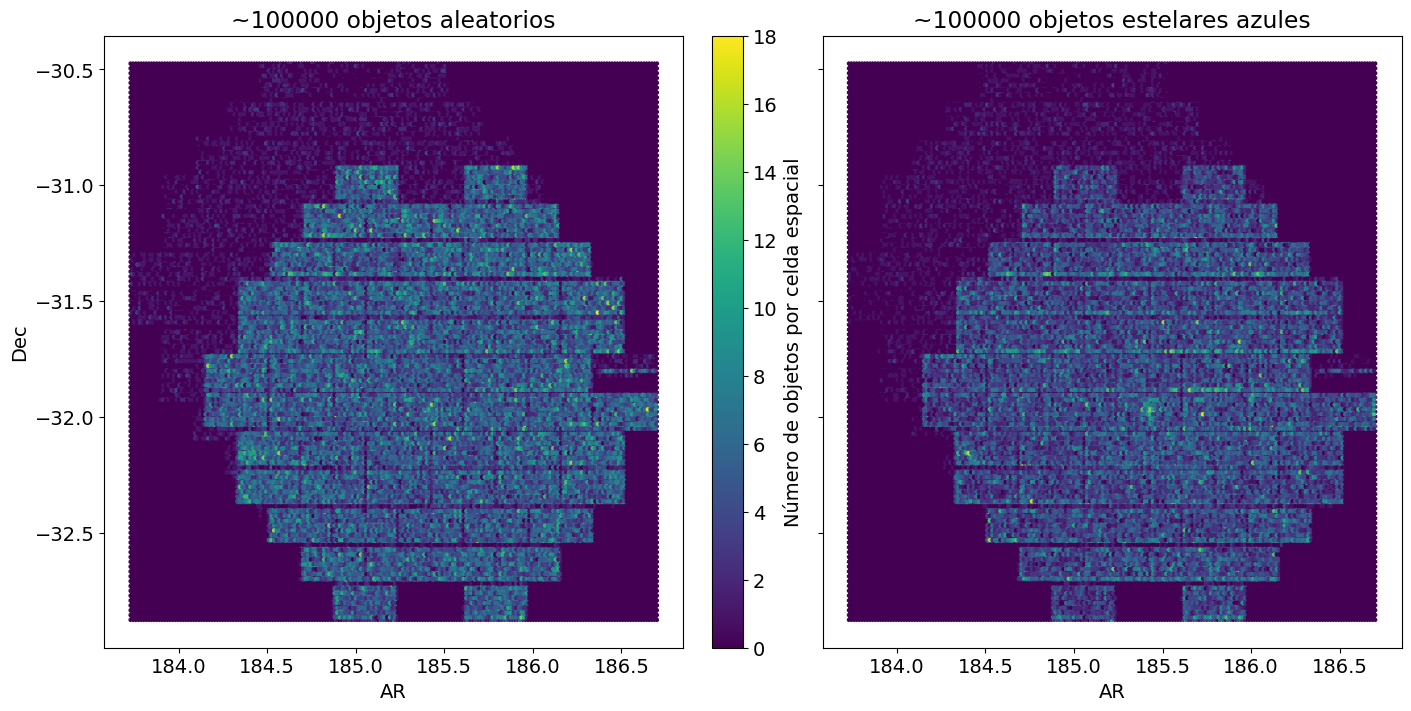

In [29]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(14,7), sharey=True, constrained_layout=True)
h1 = ax1.hexbin(df_all['ra'], df_all['dec'],gridsize=200)
ax1.set_xlabel('AR')
ax1.set_ylabel('Dec')
ax1.set_title('~100000 objetos aleatorios')
h2 = ax2.hexbin(R['ra'], R['dec'],gridsize=200)
ax2.set_xlabel('AR')
ax2.set_title('~100000 objetos estelares azules')
fig.colorbar(h1,label='Número de objetos por celda espacial');

<a class="anchor" id="kernel"></a>
# Detectar sobredensidades (núcleos Gaussianos diferenciales)
Aquí definimos el filtro para galaxias enanas como una convolución diferencial de una imagen bidimensional usando dos núcleos Gaussianos; esto tiene el efecto de una convolución con un filtro sombrero mexicano. Los núcleos por omisión buscan objetos a la escala de unos pocos minutos de arco. La salida incluye un array recortado de la distribución espacial convolucionada, que utilizaremos para la detección de máximos.

In [30]:
def filtro_de_enanas (ra,dec,fwhm_small=2.0,fwhm_big=20):

    """Convolución diferencial con núcleos gaussianos 2D.
    
       Basado en Koposov et al. (2008).
       Código por Ken Mighell y Mike Fitzpatrick.
       Pequeñas modificaciones por RN.
       
       Parámetros
       ----------
       ra, dec : float o array
           RA & Dec en grados.
    
       fwhm_small, fwhm_big : float
           Tamaños de ancho completo a la mitad (FWHM) de los núcleos gaussianos pequeño y grande
           para usar en la convolución, en minutos de arco.
    """
    
    x, y = ra, dec

    print("Calculando convolución diferencial")

    # Información sobre la declinación (y) [grados]
    ymean = (y.min() + y.max()) / 2.0
    ydiff_arcmin = (y.max() - y.min()) * 60.0 # convertir de grados a minutos de arco

    # Información sobre la ascensión recta (x) [grados en tiempo]:
    xdiff = x.max() - x.min() # separación angular [grados (tiempo)] 
    xmean = (x.min() + x.max()) / 2.0

    # Convertir de grados en tiempo a separación en grados angulares:
    xdiff_angular = (x.max() - x.min()) * np.cos(ymean*(np.pi/180.0))

    # Convertir de grados a minutos de arco
    xdiff_angular_arcmin = xdiff_angular * 60.0 

    # Obtener el número de pixeles de un minuto de arco en las direcciones x y y:
    nx = np.rint(xdiff_angular_arcmin).astype('int')
    ny = np.rint(ydiff_arcmin).astype('int')

    # Crear un histograma 2D de los conteos brutos:
    Counts, xedges, yedges  = np.histogram2d (x, y, (nx,ny) )
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    raw_hist = np.rot90(Counts).copy() # hack alrededor de la rareza pythonica

    # Crear los núcleos gaussianos pequeño y grande con desviación estándar
    # del FWHM dado en pixeles de minutos de arco^2:
    kernel_small = convolution.Gaussian2DKernel(fwhm_small/2.35,factor=1)
    kernel_big = convolution.Gaussian2DKernel(fwhm_big/2.35,factor=1)

    # Calcular los núcleos de convolución diferencial:
    conv_big = convolution.convolve(raw_hist, kernel_big)
    conv_small = convolution.convolve(raw_hist, kernel_small)
    conv_delta = conv_small - conv_big
    delta = conv_delta.copy()

    # Calcular estadísticas y el piso:
    mean = np.mean(delta, dtype='float64')
    sigma = np.std(delta, dtype='float64')
    sigmaRaw = np.std(raw_hist,dtype='float64')
    floor = mean

    print('Filtro de enanas: mean = {:g}  sigma = {:g} sigmaRaw = {:g}'.format(mean, sigma, sigmaRaw))
    
    # Recorte según límites especificados.
    clipped = delta.copy()
    clipped[delta < floor] = floor

    # Devolver los campos calculados:
    return raw_hist, extent, delta, clipped, sigma

# Ejecutar el filtro de galaxias enanas
Usaremos los núcleos de convolución por omisión de 2 y 20 minutos de arco en tamaño.

In [31]:
small_k, big_k = 2., 20.  # Tamaños de los núcleos en minutos de arco
raw, extent, delta, clipped, dsigma = filtro_de_enanas(R['ra'],R['dec'],fwhm_small=small_k,fwhm_big=big_k)

Calculando convolución diferencial
Filtro de enanas: mean = 0.0890555  sigma = 1.79455 sigmaRaw = 5.33591


# Graficar el histograma 2D convolucionado

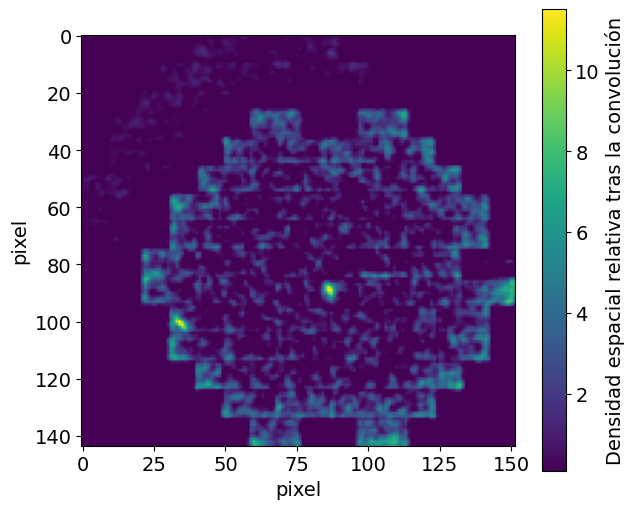

In [32]:
fig, ax = plt.subplots(figsize=(7,6))
im = plt.imshow(clipped)
plt.xlabel('pixel')
plt.ylabel('pixel')
plt.colorbar(label='Densidad espacial relativa tras la convolución');

**Se observa un máximo denso, vamos a localizarlo automáticamente...**

<a class="anchor" id="peaks"></a>
# Identificar máximos
Usaremos el paquete `photutils` para identificar máximos de 3-sigma en la imagen filtrada recortada.

In [33]:
# Encontrar máximos
mean, median, std = stats.sigma_clipped_stats(clipped,sigma=3.0,maxiters=5)
tbl = find_peaks(clipped,median+10,box_size=small_k*2)

# Agregar posiciones de AR & Dec de los máximos encontrados
a, b = extent[:2]
xvec = np.arange(a,b,(b-a)/clipped.shape[1])
a, b = extent[2:]
yvec = np.arange(a,b,(b-a)/clipped.shape[0])

tbl['ra'] = xvec[tbl['x_peak']]
tbl['dec'] = yvec[-tbl['y_peak']-1]
print(tbl)

x_peak y_peak     peak_value             ra                 dec        
------ ------ ------------------ ------------------ -------------------
    86     89  11.31152453793508 185.41055953270728 -31.976003447411664
    34    100 11.512626647783886 184.39348041275326  -32.15954180336243


# Mostrar los máximos de densidad identificados

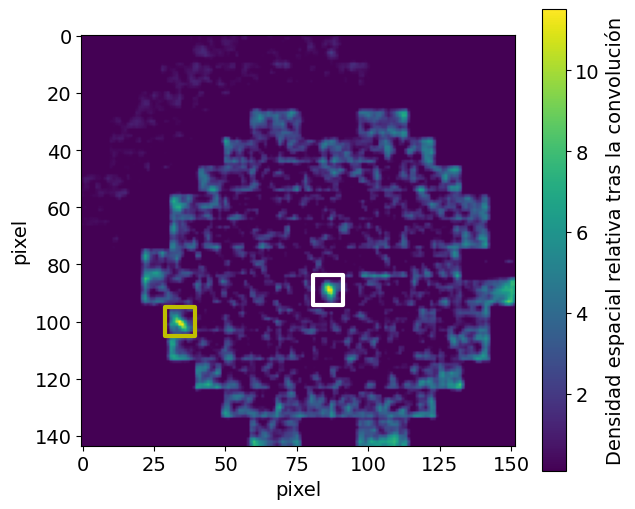

In [34]:
ecs = ['w','y'] # Color del marco de la caja
ax.scatter(tbl['x_peak'],tbl['y_peak'],marker='s',s=tbl['peak_value']*40,c='none',edgecolors=ecs,lw=3) # Sigue escribiendo en ax previo
fig  # Repite la figura (actualizada)

<a class="anchor" id="sia"></a>
# Inspeccionar los recortes de imagen alrededor de los máximos
# *Servicio de Acceso Simple de Imágnes (SIA por sus siglas en inglés)*
Data Lab viene con todo incluido. Los servicios de recorte y descarga de imágenes están incorporados.

Escribiremos solo dos pequeñas funciones:

* una para descargar las imágenes apiladas más profundas encontradas en las bandas dadas en una posición del cielo  
* y una función para graficar varias imágenes lado a lado.

In [50]:
# Configurar SIA
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/coadd_all"
svc = sia.SIAService(DEF_ACCESS_URL)

# Una pequeña función para descargar las imágenes apiladas más profundas
def descargar_imagen_mas_profunda(ra,dec,fov=0.1,bands=list('gri')):
    imgTable = svc.search((ra,dec), (fov/np.cos(dec*np.pi/180), fov), verbosity=2).to_table()
    print("La lista completa de imágenes contiene {:d} entradas.".format(len(imgTable)))
    sel0 = (imgTable['proctype'] == 'Stack') & (imgTable['prodtype'] == 'image') # Selección básica
    images = []
    for band in bands:
        print("Banda {:s}: ".format(band)) #, end='')
        sel = sel0 & (imgTable['obs_bandpass'] == band) # Agregar 'banda' a la selección
        Table = imgTable[sel] # Seleccionar
        row = Table[np.argmax(Table['exptime'].data.data.astype('float'))] # Escoger imagen con mayor tiempo de exposición
        url = row['access_url'] # Obtener URL de descarga
        print('Descargando imagen apilada más profunda...')
        img = io.fits.getdata(utils.data.download_file(url,cache=True,show_progress=False,timeout=120)) # .decode() porque en Python 3 url es tipo "byte" y getdata() espera tipo "string"
        images.append(img)
       
    print("Descargadas {:d} imágenes.".format(len(images)))
    return images

# Graficador de imágenes multi panel
def graficar_imagenes(images,titles=list('gri'),cmap=plt.cm.gray_r):
    fig = plt.figure(figsize=(8,10),tight_layout=True)
    grid = plt.GridSpec(4, 3)
    ax1 = fig.add_subplot(grid[0, 0])
    ax2 = fig.add_subplot(grid[0, 1])
    ax3 = fig.add_subplot(grid[0, 2])
    ax4 = fig.add_subplot(grid[1:, 0:])

    for j,ax,img in zip(np.arange(4),[ax1,ax2,ax3,ax4],images):
        ax.imshow(img,origin='lower',interpolation='none',cmap=cmap,norm=plt.mpl.colors.PowerNorm(0.1))
        ax.axis('off')
        ax.set_title('{:s}'.format(titles[j]))
    

# Obtener imágenes para el "cuadro amarillo izquierdo"
Descargar los recortes de imágenes apiladas más profundas (en 3 bandas) alrededor de la posición del máximo marcado con un cuadro amarillo. Dependiendo de la velocidad de la red y la carga del sistema, esto puede tardar unos segundos. También crear un compuesto en falso color de 3 bandas.

In [60]:
bands = list('gri')
idx = 1
print(tbl['ra'][idx], tbl['dec'][idx])
images = descargar_imagen_mas_profunda(tbl['ra'][idx], tbl['dec'][idx], fov=0.1, bands=bands) # FOV en grados

184.39348041275326 -32.15954180336243
La lista completa de imágenes contiene 401 entradas.
Banda g: 
Descargando imagen apilada más profunda...
Banda r: 
Descargando imagen apilada más profunda...
Banda i: 
Descargando imagen apilada más profunda...
Descargadas 3 imágenes.


Plot the images, plus a false-color 3-band image:

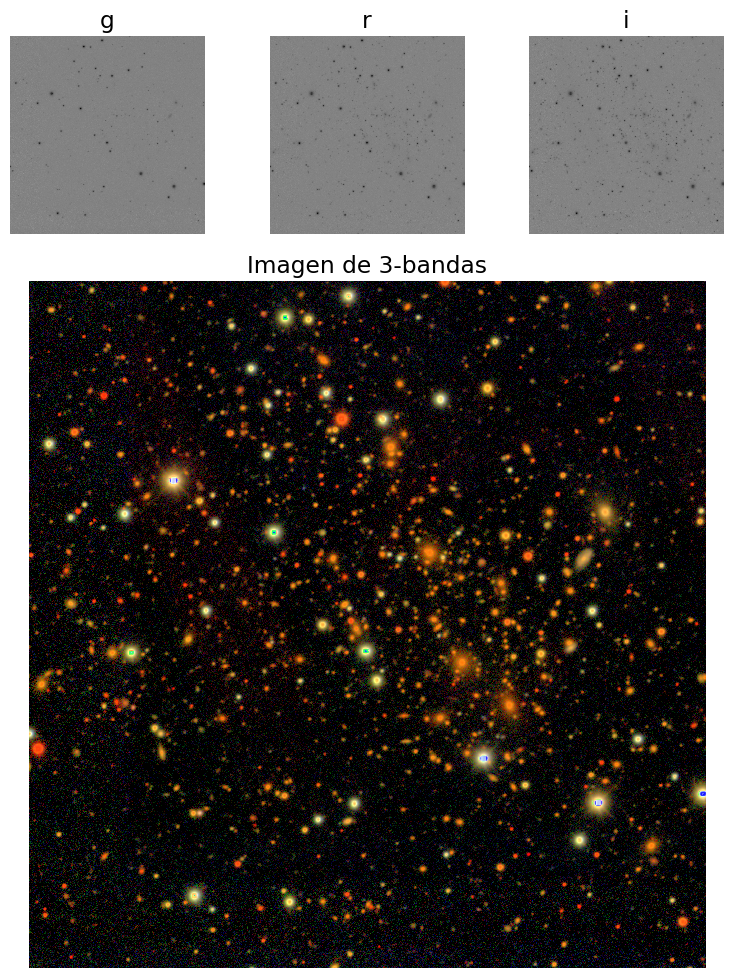

In [61]:
images = [im-np.median(im) for im in images] # Sustraer la mediana de todas las imágenes para un mejor escalado
images += [make_lupton_rgb(*images[::-1],stretch=30)] # Agregar una imagen compuesta en 3 colores
graficar_imagenes(images,titles=bands+['Imagen de 3-bandas'])

**¡Parece un cúmulo de galaxias!**

# Ahora el objeto del "cuadro blanco central"

La lista completa de imágenes contiene 403 entradas.
Banda g: 
Descargando imagen apilada más profunda...
Banda r: 
Descargando imagen apilada más profunda...
Banda i: 
Descargando imagen apilada más profunda...
Descargadas 3 imágenes.


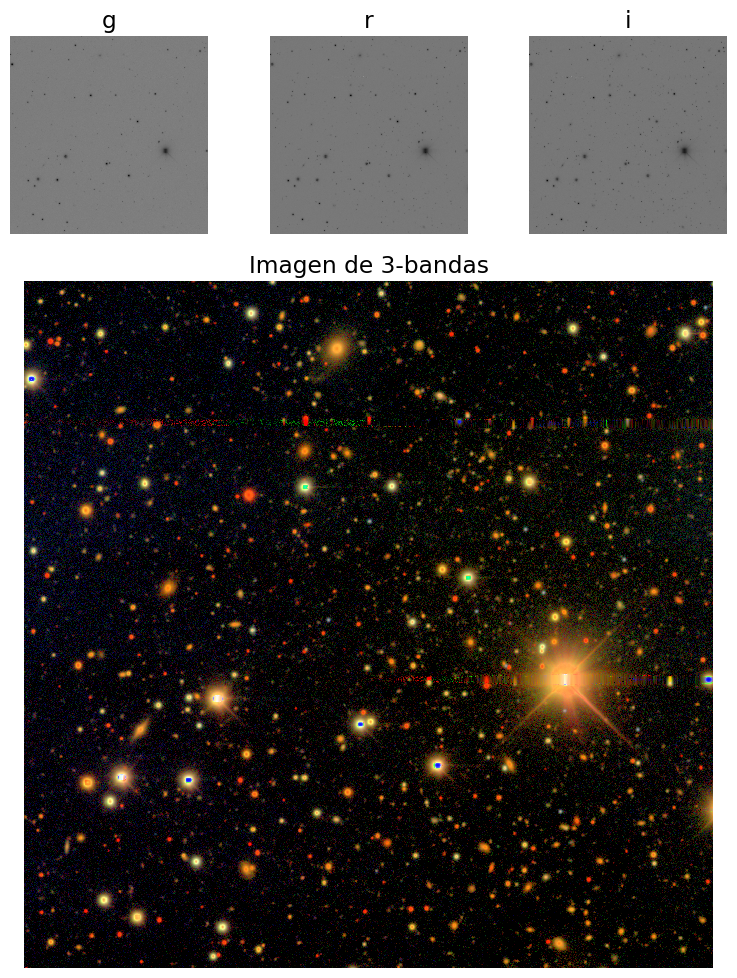

In [62]:
idx = 0
images = descargar_imagen_mas_profunda(tbl['ra'][idx], tbl['dec'][idx], fov=0.1, bands=bands) # FOV en grados
images = [im-np.median(im) for im in images] # Sustraer la mediana de todas las imágenes para un mejor escalado
images += [make_lupton_rgb(*images[::-1],stretch=30)] # Agregar una imagen compuesta en 3 colores
graficar_imagenes(images,titles=bands+['Imagen de 3-bandas'])

**Definitivamente no es un cúmulo de galaxias, sino una sobredensidad estelar**

<a class="anchor" id="cmdiagrams"></a>
# Consultar la base de datos para estrellas cercanas a máximos
Obtener fotometría de estrellas dentro de un radio de 5 minutos de arco de cada máximo de densidad.

In [63]:
def crear_consulta(ra0,dec0,radius0=5./60.,field=169):
    consulta = """
SELECT ra,dec,gmag,rmag,imag FROM smash_dr1.object
  WHERE fieldid = {:d}
    AND depthflag > 1
    AND abs(sharp) < 0.5
    AND gmag BETWEEN 9 AND 25
    AND q3c_radial_query(ra,dec,{:f},{:f},{:f})
""".format(field,ra0,dec0,radius0)

    return consulta

In [64]:
consulta0 = crear_consulta(tbl['ra'][0],tbl['dec'][0]) # AR y Dec Centrales
R0 = qc.query(sql=consulta0, fmt='pandas') # Usando el argumento sql en lugar del adql por omisión
print(R0.head()) # Un método Pandas

           ra        dec       gmag       rmag       imag
0  185.345295 -32.033874  24.745580  24.538908  24.439932
1  185.352840 -32.038977  24.814121  24.343794  23.955757
2  185.341390 -32.034610  18.762146  17.609804  17.174831
3  185.340696 -32.033947  24.666931        NaN        NaN
4  185.350117 -32.033695  24.803425  23.662357  23.163800


# Calcular color

In [65]:
R0['g_r'] = R0['gmag'] - R0['rmag']
print( R0.head())

           ra        dec       gmag       rmag       imag       g_r
0  185.345295 -32.033874  24.745580  24.538908  24.439932  0.206672
1  185.352840 -32.038977  24.814121  24.343794  23.955757  0.470327
2  185.341390 -32.034610  18.762146  17.609804  17.174831  1.152342
3  185.340696 -32.033947  24.666931        NaN        NaN       NaN
4  185.350117 -32.033695  24.803425  23.662357  23.163800  1.141068


# Ahora el otro máximo

In [66]:
query1 = crear_consulta(tbl['ra'][1],tbl['dec'][1])
R1 = qc.query(sql=query1,fmt='pandas')
R1['g_r'] = R1['gmag'] - R1['rmag'] # Calcular color
print(R1.tail()) # Otro método Pandas

              ra        dec       gmag       rmag       imag       g_r
2170  184.471635 -32.119314  24.889196  24.793587  24.467518  0.095609
2171  184.481076 -32.122957  22.749125  21.331306  20.392641  1.417819
2172  184.470299 -32.112379  23.647750  22.085228  21.719313  1.562522
2173  184.470477 -32.112378  23.919018  22.351788  21.632957  1.567230
2174  184.467250 -32.106465  24.091139  23.340645  22.943100  0.750494


# Diagramas color-magnitud de los máximos

In [67]:
def graficar_panel(axid,x,y,title='',xlim=(-1,2),ylim=(25.2,14)):
    ax = fig.add_subplot(axid)
    ax.scatter(x,y,marker='.',s=10, alpha=0.8)
    ax.set_xlabel(x.name)
    ax.set_ylabel(y.name)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_title(title)

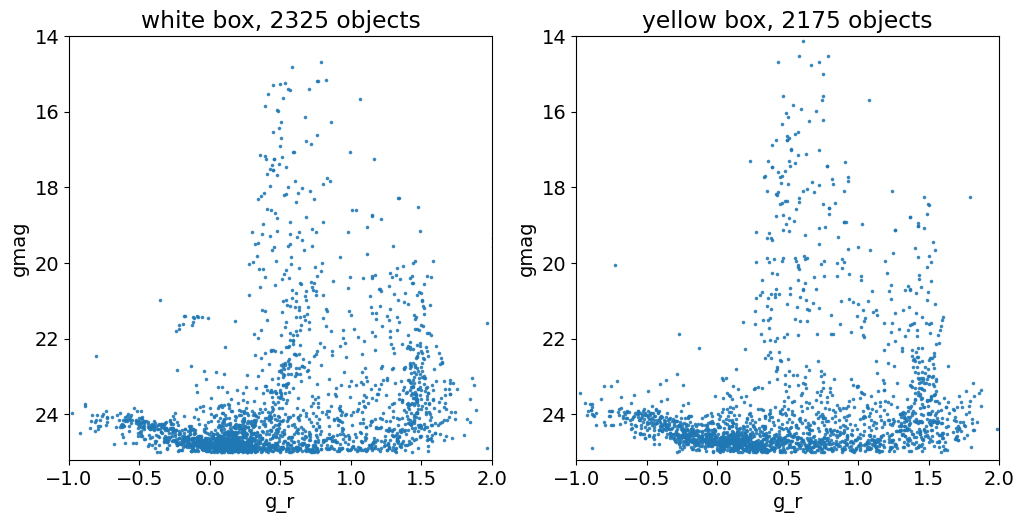

In [68]:
fig = plt.figure(figsize=(12,5.5))
graficar_panel(121,R0['g_r'],R0['gmag'],'white box, {:d} objects'.format(len(R0)))
graficar_panel(122,R1['g_r'],R1['gmag'],'yellow box, {:d} objects'.format(len(R1)))

# Comparar con Vivas+2016
￼￼￼<img style="float: left;" src="Vivas2016fig9.png">

<a class="anchor" id="savefile"></a>
# Guardar tu tabla de fotometría
Si deseas, ahora puedes guardar tu tabla de fotometría de Centaurus I en un archivo local y llevártela contigo.

In [69]:
outfile = 'hydra2.csv'
R0.to_csv(outfile,index=False)

[hydra2.csv](hydra2.csv) <-- Descarga el archivo como desees.

# Algunas ideas para mejorar

* Buscar sobredensidades en otros lugares (¡por todas partes!)

* Optimizar tamaños de los núcleos, cálculos, wavelets apropiados

<a class="anchor" id="resource"></a>
# Algunos recursos


Nidever et al. (2017) "SMASH - Survey of the MAgellanic Stellar History": http://adsabs.harvard.edu/abs/2017AJ....154..199N

Stanford et al. (2005, ApJ, 634, 2, L129) "An IR-selected Galaxy Cluster at z = 1.41": http://adsabs.harvard.edu/abs/2005ApJ...634L.129S

Koposov et al. (2008, ApJ, 686, 279) "The Luminosity Function of the Milky Way Satellites": http://adsabs.harvard.edu/abs/2008ApJ...686..279K

Martin et al. (2015, ApJ, 804, 5) "Hydra II: A Faint and Compact Milky Way Dwarf Galaxy Found in the Survey of the Magellanic Stellar History": http://adsabs.harvard.edu/abs/2015ApJ...804L...5M